# Chapter 15. 심층 합성곱 신경망으로 이미지 분류

[ 주제 ]

* 1차원과 2차원의 합성곱 연산 이해
* CNN 구조의 구성 요소 학습
* 텐서플로를 사용하여 심층 합성곱 신경망 구현

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#15.1-합성공-신경망의-구성-요소" data-toc-modified-id="15.1-합성공-신경망의-구성-요소-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>15.1 합성공 신경망의 구성 요소</a></span><ul class="toc-item"><li><span><a href="#15.1.1-CNN과-특성-계층-학습" data-toc-modified-id="15.1.1-CNN과-특성-계층-학습-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>15.1.1 CNN과 특성 계층 학습</a></span></li><li><span><a href="#15.1.2-이산-합성곱-수행" data-toc-modified-id="15.1.2-이산-합성곱-수행-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>15.1.2 이산 합성곱 수행</a></span></li><li><span><a href="#15.1.3-서브샘플링" data-toc-modified-id="15.1.3-서브샘플링-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>15.1.3 서브샘플링</a></span></li></ul></li><li><span><a href="#15.2-기본-구성-요소를-사용하여-심층-합성곱-신경망-구성" data-toc-modified-id="15.2-기본-구성-요소를-사용하여-심층-합성곱-신경망-구성-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>15.2 기본 구성 요소를 사용하여 심층 합성곱 신경망 구성</a></span><ul class="toc-item"><li><span><a href="#15.2.1-여러-개의-입력-또는-컬러-채널-다루기" data-toc-modified-id="15.2.1-여러-개의-입력-또는-컬러-채널-다루기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>15.2.1 여러 개의 입력 또는 컬러 채널 다루기</a></span></li><li><span><a href="#15.2.2-드롭아웃으로-신경망-규제" data-toc-modified-id="15.2.2-드롭아웃으로-신경망-규제-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>15.2.2 드롭아웃으로 신경망 규제</a></span></li></ul></li><li><span><a href="#15.3-텐서플로를-사용하여-심층-합성곱-신경망-구현" data-toc-modified-id="15.3-텐서플로를-사용하여-심층-합성곱-신경망-구현-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>15.3 텐서플로를 사용하여 심층 합성곱 신경망 구현</a></span><ul class="toc-item"><li><span><a href="#15.3.1-다층-CNN-구조" data-toc-modified-id="15.3.1-다층-CNN-구조-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>15.3.1 다층 CNN 구조</a></span></li><li><span><a href="#15.3.2-데이터-적재와-전처리" data-toc-modified-id="15.3.2-데이터-적재와-전처리-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>15.3.2 데이터 적재와 전처리</a></span></li><li><span><a href="#15.3.3-텐서플로-tf.keras.API로-CNN-구성" data-toc-modified-id="15.3.3-텐서플로-tf.keras.API로-CNN-구성-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>15.3.3 텐서플로 tf.keras.API로 CNN 구성</a></span></li><li><span><a href="#15.3.4-합성곱-신경망-모델-훈련" data-toc-modified-id="15.3.4-합성곱-신경망-모델-훈련-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>15.3.4 합성곱 신경망 모델 훈련</a></span></li><li><span><a href="#15.3.5-활성화-출력과-필터-시각화" data-toc-modified-id="15.3.5-활성화-출력과-필터-시각화-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>15.3.5 활성화 출력과 필터 시각화</a></span></li></ul></li></ul></div>

## 15.1 합성공 신경망의 구성 요소

합성공 신경망 또는 CNN은 뇌의 시각 피질이 물체를 인식할 때 동작하는 방식에서 영감을 얻은 모델

(시각 피질? 시각 정보를 처리하는 신피질 영역으로 후두엽에 해당)

### 15.1.1 CNN과 특성 계층 학습

관련이 높은 핵심 특징을 올바르게 추출하는 것은 모든 머신 러닝 알고리즘의 성능에서 아주 중요한 요소.

전통적인 머신 러닝 모델은 도메인 전문가가 만든 특성에 의존하거나 컴퓨터를 사용한 특성 추출 기법에 바탕.

신경망은 원본 데이터에서 작업에 가장 유용한 특성을 자동으로 학습할 수 있어 신경망을 특성 추출 엔진으로 생각하기도 함.

다층 신경망 특히 심층 합성곱 신경망은 **각 층별로 저수준 특성을 연결해 고수준 특성을 만듦으로써 소위 특성 계층을 구성**함.

Ex) 이미지를 다룬다면 엣지(edge)나 동그라미 같은 저수준 특성이 앞쪽 층에서 추출되는데, 이 특성들이 연결되어 건물, 자동차, 강아지 같은 고수준 특성을 형성함.

CNN은 입력 이미지에서 특성 맵(feature map)을 만든다. 그리고 이 맵의 각 원소는 입력 이미지의 국부적인 픽셀 patch에서 유도됨.

* 희소 연결 : 특성 맵에 있는 하나의 원소는 작은 픽셀 패치 하나에만 연결
* 파라미터 공유 : 동일한 가중치가 입력 이미지의 모든 패치에 사용

두 가지의 결과로 네트워크의 가중치 즉 파라미터 개수가 극적으로 감소하고 중요 특징을 잘 잡아내는 능력이 향상된다.

일반적으로 CNN은 **여러 개의 합성곱(conv) 층**과 **서브샘플링 층 풀링(Pooling, P)** 으로 이루어져 있다.

그리고 마지막에는 하나 이상의 완전 연결 층으로 따라오는데, 이 완전 연결 층은 모든 입력 유닛 $i$가 모든 출력 유닛 $j$에 가중치 $w_{ij}$로 연결되어 있는 다층 퍼셉트론이다.

풀링 층에는 학습되는 파라미터가 없다. 즉, 풀링 층에는 가중치나 절편 유닛이 없다. 하지만 합성곱이나 완전 연결 층은 가중치와 절편을 가짐.

### 15.1.2 이산 합성곱 수행

이산 합성곱은 CNN의 기본 연산이다. 

**1차원 이산 합성곱 연산 수행**

두 개의 1차원 벡터 $x$와 $w$에 대한 이산 합성곱은 $y = x * w$로 나타낸다.

(여기서 $x$는 입력 또는 신호를 의미하고, $w$는 필터 또는 커널을 의미한다.)

[ 이산 합성곱의 수학적 정의 ]

$y = x * w -> y[i] = sum_{-inf}^{+inf} x[i-k]w[k]$

1) 인덱스 -inf부터 +inf까지 합

머신 러닝 애플리케이션은 항상 유한한 특성 벡터를 다루기 때문에 $-inf$ 부터 {+inf}까지 합으로 나타낸다. 

예를 들어 $x$가 0, 1, 2, ... , 8, 9 인덱스로 열 개의 특성을 가지고 있다면 $-inf : -1$과 $10 : +inf$ 인덱스는 $x$ 범위 밖이다. 따라서 $x$와 $w$가 0으로 채워져 있다고 가정해야 하고, 출력 벡터 $y$도 0으로 채워진 무한 크기가 되는데, 이는 실제 적용에서 유용하지 않아 유한한 개수의 0으로 $x$가 패딩된다. 그리고 이러한 과정을 **제로 패딩(zero padding)** 또는 **패딩(padding)** 이라고 한다.

2) $i+m-k$로 $x$를 인덱싱 

$x$와 $w$가 다른 방향으로 인덱싱하기 때문에 패딩된 후에 $x$ 또는 $w$ 벡터 중 하나를 뒤집어 간단히 점곱으로 계산이 가능하다. 

[ 1차원 합성곱 ]

1단계. 필터를 뒤집는다.

2단계. 출력 원소 $i$에 대해 $x[i : i+4] * w^{r}$ 점곱 계산 (2칸씩 필터 이동)

여기서 2칸씩 이동하는 필터, 양은 **stride**라고 하며, 합성곱 하이퍼파라미터 중 하나이다. 스트라이드는 입력 벡터의 크기보다 작은 양수 값이어야 한다.

**합성곱에서 제로 패딩의 효과**

[ 자주 사용하는 패딩 방법 ]

* 풀 패딩(full padding) : 패딩 파라미터 $p$를 $p = m-1$로 설정. 하지만 출력 크기를 증가시켜 합성곱 신경망 구조에서는 잘 사용하지 않음.

* 세임 패딩(same padding) : 출력 크기가 입력 벡터 $x$와 같아야 할 때 사용하는 것으로, 패딩 파라미터 $p$는 입력과 출력의 크기가 동일해야 하므로 필터 크기에 따라 결정.

* 밸리드 패딩(valid padding) : 합성곱 파라미터 $p$가 0인 경우, 즉 패딩이 없음.

합성곱 신경망에서 가장 많이 사용되는 패딩 방법은 same padding으로, 다른 패딩 방식에 비해 입력 이미지나 텐서의 높이와 너비를 유지시킨다. 따라서 네트워크 구조를 설계하기 용이하다.

반면에 valid padding은 신경망에 층이 추가될수록 점진적으로 텐서 크기가 줄어들어 신경망 성능을 나쁘게 할 수 있다는 단점 존재.

**합성곱 출려 크기 계산**

합성곱 출려긔 크기는 입력 벡터 위를 필터 $w$가 이동하는 전체 횟수로 결정된다.

In [1]:
## 1차원 합성곱 신경망의 계산 방법 코드 ##

import numpy as np

def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad,
                                   x_padded,
                                   zero_pad])
    
    res = []
    for i in range(0, int(len(x)/s), s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    
    return np.array(res)

In [2]:
## 테스트 ##

x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Con1d 구현 : ', conv1d(x, w, p=2, s=1))

# numpy.convolve 함수와 비교
print('넘파이 결과 : ', np.convolve(x, w, mode='same'))

Con1d 구현 :  [ 5. 14. 16. 26. 24. 34. 19. 22.]
넘파이 결과 :  [ 5 14 16 26 24 34 19 22]


**2D 이산 합성곱 수행**

$m_1 <= n_1$이고 $m_2 <= n_2$인 행렬 $X_{n_1 * n_2}$와 필터 행렬 $W_{m_1 * m_2}$같은 2차원 입력을 다룰 때 $X$와 $W$의 2D 합성곱 결과는 행렬 $Y = X * W$가 된다. 

In [3]:
## 2D 합성곱 구현 - scipy.signal 패키지는 2D 합성곱 계산할 수 있는 scipy.signal.convolve2d 함수 제공## 

import numpy as np
import scipy.signal

def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1, ::-1]
    X_orig = np.array(X)
    
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0] : p[0]+X_orig.shape[0],
             p[1] : p[1]+X_orig.shape[1]] = X_orig
    
    res = []
    for i in range(0, int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0],
                             j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    
    return(np.array(res))

In [5]:
X = [[1, 2, 3, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Con2d 구현 : \n', conv2d(X, W, p=(1, 1), s=(1, 1)))

print('사이파이 결과 : \n', scipy.signal.convolve2d(X, W, mode='same'))

Con2d 구현 : 
 [[10. 24. 33. 14.]
 [19. 24. 24. 14.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
사이파이 결과 : 
 [[10 24 33 14]
 [19 24 24 14]
 [13 28 25 17]
 [11 17 14  9]]


### 15.1.3 서브샘플링

서브샘플링은 전형적인 두 종류의 풀링 연산으로 합성곱 신경망에 적용.

* 최대 풀링(max-pooling) : 이웃한 픽셀에서 최댓값 선택
* 평균 풀링(mean-pooling 또는 average-pooling) : 픽셀의 평균을 계산

[ 풀링의 장점 ]

* 최대 풀링은 일종의 지역 불변성 생성 - 국부적인 작은 변화가 최대 풀링의 결과를 바꾸지 못함. 

즉, 입력 데이터에 있는 잡음에 좀 더 안정적인 특성 새성

* 특성의 크기를 줄이므로 계산 효율성을 높이고, 특성 개수가 줄어들어 과대적합도 감소

## 15.2 기본 구성 요소를 사용하여 심층 합성곱 신경망 구성

행렬-벡터 곱셈을 이용해 활성화 함수의 입력 또는 최종 입력 $a = Wx + b$를 계산.

($x$는 픽셀을 나타내는 열 벡터, $W$는 입력 필셀과 각 은닉 유닛을 연결하는 가중치 행렬 의미)

합성곱 신경망에서는 $A = W * X + b$로 변경된다. 

($X$는 높이 * 너비의 픽셀을 나타내는 행렬 의미)

### 15.2.1 여러 개의 입력 또는 컬러 채널 다루기

[ 입력 데이터 구조 ]

* 합성곱 층의 입력 샘플에는 $N_1 * N_2$ 차원 (ex. 이미지의 높이와 너비 픽셀 등)인 하나 이상의 2D 배열 또는 행렬이 포함될 수 있는데, 이런 행렬을 채널(channel)이라고 한다. 

* 여러 개의 채널을 합성곱 층 입력에 사용하기 때문에 랭크 3 텐서 또는 3차원 배열 $X_{N_1 * N_2 * C_m}$을 사용해야 한다. 여기서 $C_m$은 입력 채널 크기 의미.

* 예를 들어 CNN의 첫 번째 층에 입력되는 이미지가 RGB 모드의 컬러 이미지라면 $C_{in} = 3$, 이미지가 그레이스케일이라면 흑백의 픽셀 강도를 가진 하나의 채널만 있으므로 $C_{in} = 1$이 된다. 

[ 합성곱 연산에서의 여러 개의 입력 채널 ]

* 각 채널별로 합성곱 연산을 수행하고 행렬 덧셈으로 결과를 합침. 

### 15.2.2 드롭아웃으로 신경망 규제

CNN 중 어떤 것을 사용하든지 네트워크 크기를 결정하는 것은 어렵고, 어느 정도 좋은 성능을 얻기 위해서는 가중치 행렬 크기와 층 개수를 튜닝해야 한다. 

파라미터 개수가 적은 네트워크 용량이 작아 과소적합 되기 쉬우며, 복잡한 데이터셋에 내재된 구조를 학습할 수 없어 성능이 나빠진다.

반면에 아주 큰 네트워크는 과대적합 가능성이 커져, 훈련 세트에서는 잘 작동하지만 별도의 테스트 세트에서는 나쁜 성능을 낸다.

문제를 해결하기 위해서는 훈련 세트에서 잘 작동하도록 비교적 큰 용량의 네트워크를 구축하고 과대적합을 방지하기 위해 한 개 이상의 규제 방법을 적용해 별도의 테스트 세트 같은 새로운 데이터에서 일반화 성능을 높인다.

**드롭아웃(dropout)**

보통 깊은 층의 은닉 유닛에 적용하는데, 신경망의 훈련 단계에서 반복마다 $P_{drop}$ 확률로 은닉 유닛의 일부가 랜덤하게 꺼진다. 이 확률은 사용자가 지정해야 하며 보통 0.5를 많이 사용하는데, 입력 뉴런의 일부를 끄면 남은 뉴런에 연결된 가중치가 누락된 비율만큼 증가된다. 

랜덤한 드롭아웃의 영향으로 네트워크는 데이터에서 여분의 표현을 학습하게 되고, 훈련 과정에서 언제든지 은닉 유닛이 꺼질 수 있어 네트워크가 일부 은닉 유닛의 활성화 값에 의존할 수 없다. 이는 네트워크가 데이터에서 더 일반적이고 안정적인 패턴을 학습하게 만든다. 

드롭아웃 확률로 0.5를 주게 되면, 절반의 뉴런은 랜덤하게 활성화되지 않는다. 하지만 예측할 때는 모든 뉴런이 참여해 다음 층의 활성화 함수 입력을 계산한다. 

## 15.3 텐서플로를 사용하여 심층 합성곱 신경망 구현

CNN으로 손글씨 숫자 분류에 대한 예측 성능 확인

### 15.3.1 다층 CNN 구조

입력은 28 X 28 크기의 그레이스케일 이미지로, 채널 개수(그레이스케일 이미지이므로 1)와 입력 이미지의 배치를 생각하면 입력 텐서의 차원은 batchsize X 28 X 28 X 1이 된다. 

입력 데이터는 5 X 5 크기의 커널을 가진 두 개의 합성곱 층으로, 첫 번째 합성곱은 32개의 특성 맵을 출력하고 두 번째는 64개의 특성 맵을 추출한다. 그리고 각 합성곱 층 다음에는 서브샘플링으로 최대 풀링 연산.

다음으로 완전 연결 층의 출력이 ㅚ종 소프트맥스 층인 두 번째 완전 연결 층으로 전달.

[ 각 층의 텐서 차원 ]

* 입력 : [batchsize x 28 x 28 x 1]
* 합성곱_1 : [batchsize x 24 x 24 x 32]
* 풀링_1 : [batchsize x 12 x 12 x 32]
* 합성곱_2 : [batchsize x 8 x 8 x 64]
* 풀링_2 : [batchsize x 4 x 4 x 64]
* 완전 연결_1 : [batchsize x 1024]
* 완전 연결과 소프트맥스 층 : [batchsize x 10]

### 15.3.2 데이터 적재와 전처리

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 데이터 적재 ### 

mnist = tf.keras.datasets.mnist
(x_data, y_data), (x_test, y_test) = mnist.load_data()

x_train, y_train = x_data[:50000, :], y_data[:50000]
x_valid, y_valid = x_data[50000:, :], y_data[50000:]

x_train = np.reshape(x_train, (50000, 784))
x_valid = np.reshape(x_valid, (10000, 784))
x_test = np.reshape(x_test, (10000, 784))

print('훈련 세트 : ', x_train.shape, y_train.shape)
print('검증 세트 : ', x_valid.shape, y_valid.shape)
print('테스트 세트 : ', x_test.shape, y_test.shape)

훈련 세트 :  (50000, 784) (50000,)
검증 세트 :  (10000, 784) (10000,)
테스트 세트 :  (10000, 784) (10000,)


훈련 성능을 높이고 최적 값에 잘 수렴하기 위해 데이터 정규화(평균을 원점에 맞추고 표준 편차로 나누기)

훈련 데이터의 특성마다 평균을 계산하고 모든 특성에 걸쳐 표준 편차 계산.

각 특성별로 표준 편차를 계산하지 않는 이유 : MNIST 같은 이미지 데이터셋에 있는 일부 특성, 픽셀 값은 모든 이미지에서 동일하게 255이기 때문에 모든 샘플에서 고정된 값이면 변동이 없고 표준 편차가 0이 되므로 0-나눗셈 에러가 발생하게 된다. 

따라서 x_train 전체의 표준 편차를 계산하기 위해 np.std 함수의 axis 매개변수를 지정하지 않음.

In [16]:
mean_vals = np.mean(x_train, axis=0)
std_val = np.std(x_train)

x_train_centered = (x_train - mean_vals) / std_val
x_valid_centered = (x_valid - mean_vals) / std_val
x_test_centered = (x_test - mean_vals) / std_val

이미지를 2차원 배열로 읽었기 때문에 샘플마다 하나의 행을 차지하며 784개의 픽셀에 해당하는 열이 있는데, 합성곱 신경망에 데이터를 주입하기 위해서는 784개의 행을 원본 이미지의 차원과 동일한 28 x 28 x 1 크기로 바꾸어야 한다. 

(MNIST 이미지는 흑백 이미지이므로 마지막 컬러 채널이 의미가 없지만, 합성곱 연산에서는 마지막 채널 차원이 필요함.)

In [17]:
x_train_centered = x_train_centered.reshape((-1, 28, 28, 1))
x_valid_centered = x_valid_centered.reshape((-1, 28, 28, 1))
x_test_centered = x_test_centered.reshape((-1, 28, 28, 1))

to_categorical 함수를 사용해 원-핫 인코딩으로 변경

In [22]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

# 원-핫 인코딩으로 잘 변환되었는지 확인 - 첫 번째 훈련 레이블은 숫자 5이므로 6번째 행이 1이 되어야 함.
print(y_train[0], y_train_onehot[0])
print()

# 변경된 훈련 세트와 검증 세트, 테스트 세트의 크기 출력
print('훈련 세트 : ', x_train_centered.shape, y_train_onehot.shape)
print('검증 세트 : ', x_valid_centered.shape, y_valid_onehot.shape)
print('테스트 세트 : ', x_test_centered.shape, y_test_onehot.shape)

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

훈련 세트 :  (50000, 28, 28, 1) (50000, 10)
검증 세트 :  (10000, 28, 28, 1) (10000, 10)
테스트 세트 :  (10000, 28, 28, 1) (10000, 10)


### 15.3.3 텐서플로 tf.keras.API로 CNN 구성

In [24]:
from tensorflow.keras import layers, models

## Sequential 클래스의 객체 생성
model = models.Sequential()

## Conv2D 클래스를 모델에 추가 
model.add(layers.Conv2D(32, (5, 5), padding='valid',
                        activation='relu', input_shape=(28, 28, 1))) 

## 최대 풀링 층 추가
model.add(layers.MaxPooling2D((2, 2)))

## 두 번째 합성곱 층 추가 - 64개 필터 사용
model.add(layers.Conv2D(64, (5, 5), padding='valid', 
                        activation='relu'))

## 두 번째 풀링 층 추가
model.add(layers.MaxPooling2D((2, 2)))

## 완전 연결 층인 Dense 층에 연결하기 위해 텐서를 일렬로 펼침
model.add(layers.Flatten())

## 완전 연결 층에 연결
model.add(layers.Dense(1024, activation='relu'))

## 드롭아웃 층 추가
model.add(layers.Dropout(0.5))

## 열 개의 유닛을 가진 완전 연결 층 추가 - 다중 분류를 위한 활성화 함수로 softmax 사용
model.add(layers.Dense(10, activation='softmax'))

In [25]:
## 합성공 신경망의 구조 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

### 15.3.4 합성곱 신경망 모델 훈련

In [26]:
## 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [27]:
## 콜백 함수 정의
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5',
                                 monitor='val_loss',
                                 save_best_only=True),
                 TensorBoard(log_dir="logs/{}".format(time.asctime()))]

In [32]:
history = model.fit(x_train_centered, y_train_onehot,
                    batch_size=64, epochs=20,
                    validation_data=(x_valid_centered, y_valid_onehot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.1343 - acc: 0.9581 - val_loss: 0.0514 - val_acc: 0.9852
Epoch 2/20
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.0499 - acc: 0.9845 - val_loss: 0.0432 - val_acc: 0.9864
Epoch 3/20
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.0347 - acc: 0.9892 - val_loss: 0.0359 - val_acc: 0.9883
Epoch 4/20
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.0287 - acc: 0.9910 - val_loss: 0.0403 - val_acc: 0.9891
Epoch 5/20
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.0234 - acc: 0.9930 - val_loss: 0.0430 - val_acc: 0.9891
Epoch 6/20
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0351 - val_acc: 0.9902
Epoch 7/20
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.0189 - acc: 0.9940 - val_loss: 0.

fit 메서드에서 반환된 history 객체를 사용해 훈련 세트와 테스트 세트에 대한 손실과 정확도 그래프

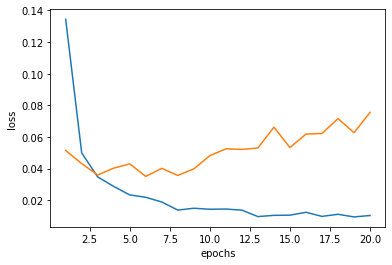

In [33]:
## 손실 그래프
import matplotlib.pyplot as plt

epochs = np.arange(1, 21)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

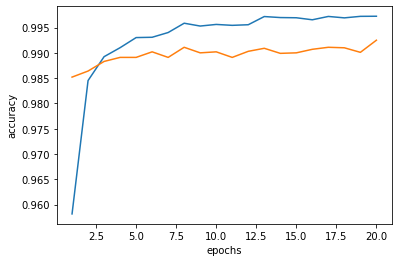

In [34]:
## 정확도 그래프
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

모델과 가중치 저장

In [35]:
model.save('cnn_model.h5')

저장된 모델을 다시 불러와 새로운 모델 객체 생성

In [38]:
from tensorflow.keras.models import load_model

restored_model = load_model('cnn_model.h5')

복원된 모델을 사용해 테스트 세트에서 평가

In [39]:
restored_model.evaluate(x_test_centered, y_test_onehot)

10000/10000 [==============================] - 3s 344us/sample - loss: 0.0557 - acc: 0.9928


[0.05574618913623501, 0.9928]

테스트 샘플 중 처음 열 개의 예측 확인

In [40]:
np.argmax(restored_model.predict(x_test_centered[:10]), axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

비교를 위해 처음 열 개의 테스트 레이블 확인

In [41]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

열 개의 숫자가 어떤 모습인지 확인하기 위해 샘플 이미지 출력

x_test_centered는 행을 따라 샘플이 놓여 있는 2차원 배열로 784개의 열을 28 x 28로 바꾸어 출력

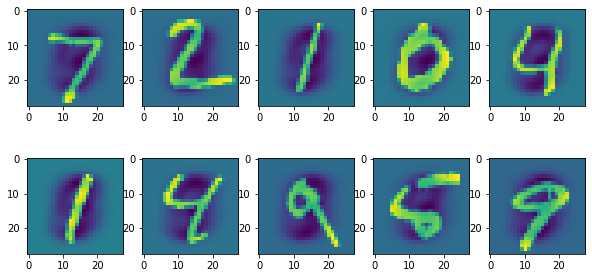

In [42]:
fig = plt.figure(figsize=(10, 5))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(x_test_centered[i].reshape(28, 28))

### 15.3.5 활성화 출력과 필터 시각화

첫 번째 합성곱 층의 출력을 이미지로 시각화.

model 객체에 추가한 층은 layers 속성으로 참조 가능.

In [44]:
first_layer = model.layers[0]
print(first_layer)

first_layer의 output 속성을 함수형 API의 출력으로 사용하면 첫 번째 층의 활성화 출력을 얻을 수 있다.

In [45]:
print(model.input)

Tensor("conv2d_2_input:0", shape=(None, 28, 28, 1), dtype=float32)


첫 번째 합성곱 층을 추가할 때 input_shape 매개변수에 입력 크기를 (28, 28, 1)로 지정했기 때문에 model.input의 크기는 배치 차원이 추가되어 (None, 28, 28, 1)이다. 

입력과 출력 텐서가 모두 준비되었으므로 이 둘을 연결한 새로운 모델 생성 후 테스트 세트에서 처음 열 개의 샘플을 주입해 출력

In [48]:
first_activation = models.Model(inputs=model.input,
                               outputs=first_layer.output)
activation = first_activation.predict(x_test_centered[:10])

In [49]:
# activation 텐서의 크기 확인
print(activation.shape)

(10, 24, 24, 32)


열 개의 테스트 샘플을 입력했으므로 첫 번째 배치 차원은 10이고, 합성곱을 통과하며 높이와 너비가 각각 24 x 24로 줄었다.

첫 번째 합성곱 층의 필터가 32개이므로 마지막 차원이 32가 된다.

열 개의 샘플 중 첫 번째 샘플의 특성 맵 32개 출력

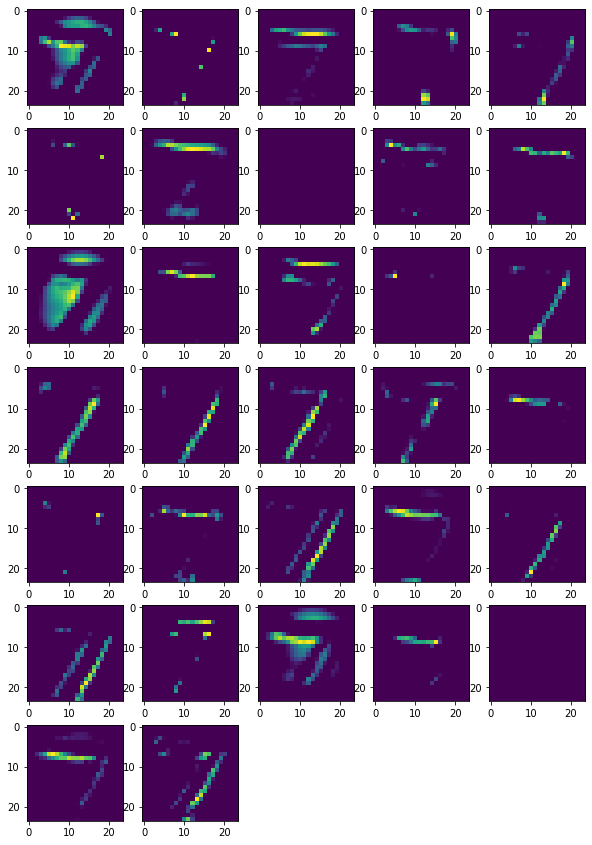

In [50]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(activation[0, :, :, i])

네 번째 숫자의 특성 맵 출력

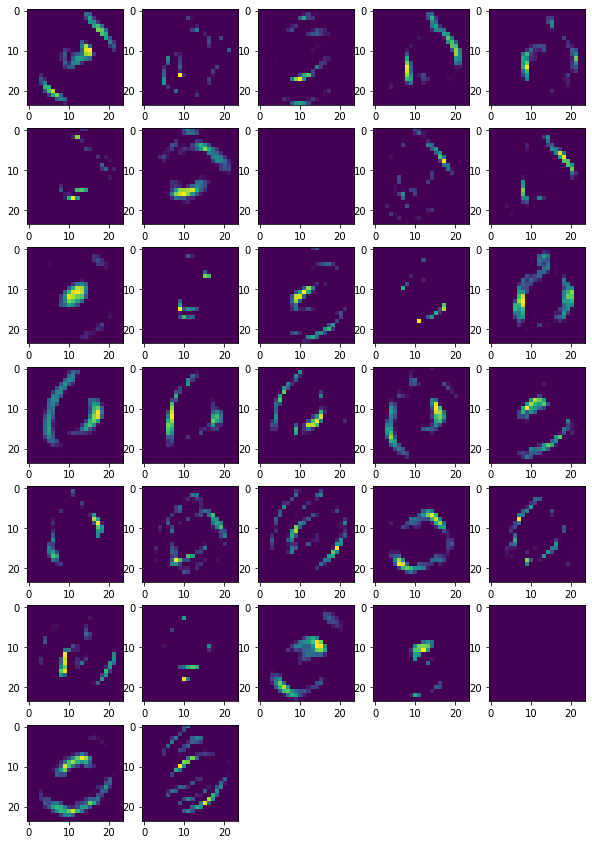

In [51]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(activation[3, :, :, i])

특성 맵마다 필터가 서로 다른 부분을 학습하기 때문에 조금씩 다른 숫자 0의 윤곽을 추출한다.

첫 번째 층의 필터 출력.

합성곱 필터는 합성곱 층의 kernel 속성에 저장되어 있어 필터의 차원은 (높이, 너비, 입력 채널, 출력 채널), imshow 함수는 그레이스케일 이미지일 경우 (높이, 너비), 컬러 이미지일 경우 (높이, 너비, 3)인 배열 기대.

MNIST는 그레이스케일 이미지로 필터의 입력 채널은 한 개. 따라서 입력 채널의 인덱스를 0으로 고정하고 마지막 출력 채널을 순회하면서 필터 출력

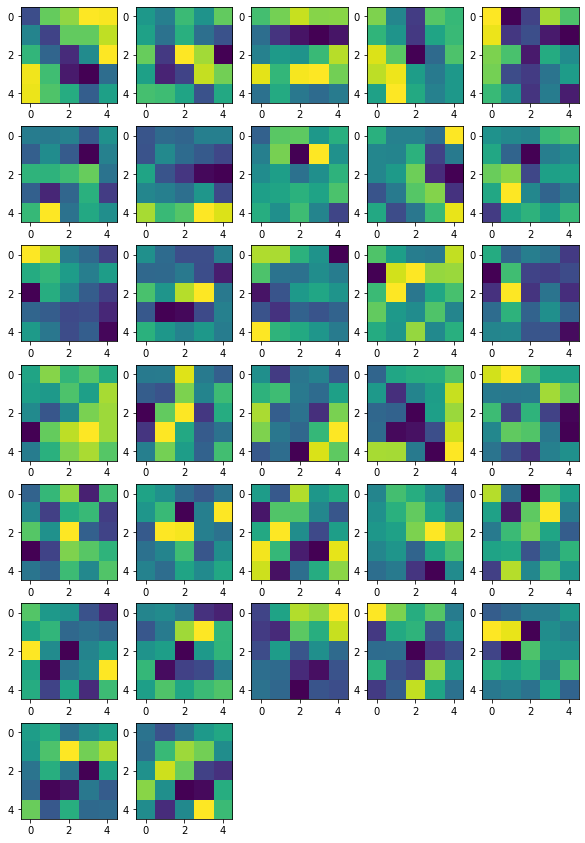

In [52]:
fig = plt.figure(figsize=(10, 15))
for i in range(32):
    fig.add_subplot(7, 5, i+1)
    plt.imshow(first_layer.kernel[:, :, 0, i])

필터의 밝은 부분이 높은 값을 의미한다. 

예를 들어 아홉 번째 필터는 수평 edge를 학습하는 것으로 보인다. 이 필터를 사용해 숫자 7에서 추출된 특성은 수평 부분이 잘 나타나 있다. 

반대로 0은 수평 부분이 많지 않아 추출된 특성에 정보가 많이 담겨있지 않는다.